In [18]:
import numpy as np
import pandas as pd
import warnings
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline


In [19]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Introuction
Airbnb is a popular online platform that facilitates lodging and travel experiences. It connects people who have space to rent, whether it's an entire house, apartment, a spare room, or even unique accommodations like treehouses or castles, with travelers looking for short-term accommodations. Here's how Airbnb works:

1. **Hosts: Individuals or property owners can list their spaces on Airbnb. They provide details about the property, including photos, descriptions, amenities, availability, and pricing. Hosts set their own prices and house rules.

2. **Travelers: People looking for a place to stay while traveling can search Airbnb's extensive listings. Travelers can filter their search based on location, dates, price range, and property type. They can read reviews from previous guests to make informed decisions.

3. **Booking: Once a traveler finds a suitable listing, they can send a booking request to the host. Hosts have the option to accept or decline the request. Many listings offer instant booking, where guests can book without prior approval from the host.

4. **Payment: Airbnb handles the financial transactions. Guests pay Airbnb, which holds the payment until 24 hours after check-in. Hosts receive their payment, minus Airbnb's service fees, after the guest's stay begins.

5. **Stay: The guest stays at the host's property, following any house rules and guidelines set by the host. Hosts often provide recommendations for local attractions and restaurants to enhance the guest's experience.

6. **Review and Rating: After the stay, both the host and the guest can leave reviews and ratings for each other. This system helps maintain trust within the Airbnb community.

7. **Support: Airbnb offers customer support for both hosts and guests. They handle issues such as booking problems, cancellations, and disputes.

Airbnb has transformed the way people travel and access accommodations. It provides a wide range of lodging options, often at competitive prices, and allows travelers to experience unique and personalized stays in different parts of the world. It has also opened up income opportunities for hosts who can rent out their spare space, helping them earn extra income.

As of my last knowledge update in September 2021, Airbnb was available in numerous countries and cities worldwide. However, please note that the company's policies, offerings, and availability may change over time, so it's a good idea to visit Airbnb's official website for the most up-to-date information.



In [37]:
# load data 
df = pd.read_csv(r'D:/quetions/archive/listings.csv.gz')

In [42]:
df.head()

id                          listing_url       scrape_id last_scraped           source                                                                    name  \
0  155548  https://www.airbnb.com/rooms/155548  20230605223331   2023-06-06  previous scrape        Rental unit in Amsterdam · ★4.76 · 1 bedroom · 1 bed · 1.5 baths   
1  162467  https://www.airbnb.com/rooms/162467  20230605223331   2023-06-06      city scrape           Rental unit in Amsterdam · ★4.77 · 1 bedroom · 1 bed · 1 bath   
2  213371  https://www.airbnb.com/rooms/213371  20230605223331   2023-06-06  previous scrape      Rental unit in Amsterdam · ★4.86 · 3 bedrooms · 4 beds · 1.5 baths   
3  214531  https://www.airbnb.com/rooms/214531  20230605223331   2023-06-06      city scrape  Rental unit in Amsterdam · ★4.82 · 1 bedroom · 2 beds · 1 private bath   
4    2818    https://www.airbnb.com/rooms/2818  20230605223331   2023-06-05      city scrape      Condo in Amsterdam · ★4.89 · 1 bedroom · 2 beds · 1.5 shared baths   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
0  Stay in one of the most vibrant neighborhoods of the city, with bars, restaurants, clubs, parks and just 2 minutes walk from the historic city centre, with its rings of canals. Enjoy being a 15 minutes bike or tram ride from central station, while having a very comfortable apartment for you and your friends, to which you can even walk back at night without all the fuss!<br /><br /><b>The space</b><br />Centrally placed beautiful apartment 15 minutes walk from the Artis Zoo and the Ortus Botanicus, Dappermarkt and Oosterpark. Strategically placed, close to main public transports, several tramways (14, 9, 10, 3, 7, 22) and Muiderpoort train station. You can walk from here in just 20 minutes to the magic Waterlooplein (doorstep of Rembrandtplein and the Nieuwmarkt) and do all your shoppings in the most multicultural and convenient market in town, the Dappermarkt, your backyard. Or you can stay at home, in a great neighborhood, enjoying the local jazz bars and traditional mill powered brew   
1  Stylish (recently painted and redecorated) ground floor apartment. Living room with a huge and comfy couch and big screen tv (with Netflix) Sonos sound system) One bedroom with a double bed. IThe bathroom is completely renovated and looks amazing.!<br /><br /><b>The space</b><br />I have a modern and clean ground floor apartment (no steep stairs are rare in amsterdam) in 'Amsterdam West'.<br />(just a few minutes from the Vondelpark and City Center) <br /><br />You can use my bike (the best way to get around in Amsterdam) but the tramstop (7&17 tram) is only a few steps from my house, <br />which takes you into the center of Amsterdam within 10 min. Parking isn't free in front of my house but there are free parking possibilities nearby.<br /><br />Just around the corner there is a very long <br />"shopping" street the "Kinkerstraat" for all your daily needs and more. My apartment is only 20 min. from the airport or central station,<br /><br />Main attractions like th

Data Shape , Info , Description

In [43]:
df.shape

(7608, 75)

In [44]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
    

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   int64  
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   int64  
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

In [39]:
important_featutes = ['name','host_id','host_name', 'host_since', 'host_location','host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost','host_neighbourhood', 'host_listings_count','host_total_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90','availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value', 'license', 'instant_bookable','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 'reviews_per_month']

important_features_df= df[important_featutes]

In [40]:
# Null value
important_features_df.isna().sum()

name                                               0
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                    822
host_response_time                              2259
host_response_rate                              2259
host_acceptance_rate                            1222
host_is_superhost                               1213
host_neighbourhood                              4580
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood                                   2770
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    7608
latitude                                           0
longitude                                     

In [46]:
important_features_df.groupby(['bathrooms_text'])['bathrooms_text'].value_counts()

bathrooms_text     bathrooms_text   
0 baths            0 baths                15
0 shared baths     0 shared baths         18
1 bath             1 bath               3343
1 private bath     1 private bath        784
1 shared bath      1 shared bath         347
1.5 baths          1.5 baths            2152
1.5 shared baths   1.5 shared baths      192
17 baths           17 baths                1
2 baths            2 baths               409
2 shared baths     2 shared baths          9
2.5 baths          2.5 baths             172
2.5 shared baths   2.5 shared baths        2
3 baths            3 baths                92
3 shared baths     3 shared baths          4
3.5 baths          3.5 baths              29
4 baths            4 baths                 5
4 shared baths     4 shared baths          1
4.5 baths          4.5 baths               5
5 baths            5 baths                 5
5.5 baths          5.5 baths               2
7 baths            7 baths                 1
Half-bath         

In [47]:
important_features_df[important_features_df['bathrooms_text'].isna() ==False].head(10)['bathrooms_text']

0           1.5 baths
1              1 bath
2           1.5 baths
3      1 private bath
4    1.5 shared baths
5      1 private bath
6           1.5 baths
7           1.5 baths
8       1 shared bath
9              1 bath
Name: bathrooms_text, dtype: object

In [48]:
important_features_df.isna().sum()

name                                               0
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                    822
host_response_time                              2259
host_response_rate                              2259
host_acceptance_rate                            1222
host_is_superhost                               1213
host_neighbourhood                              4580
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood                                   2770
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    7608
latitude                                           0
longitude                                     

In [49]:
important_features_df.drop(['calendar_updated'],axis=1,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\1560370529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(['calendar_updated'],axis=1,inplace=True)


In [50]:
def findchrandnum(x):
    try :
        return all(x.str.isalnum() & ~x.str.isalpha() & ~x.str.isdigit())
    except:
        return False

In [51]:
important_features_df.dtypes

name                                             object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                               object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                    float64
latitude                                        

In [57]:
important_features_df.describe()

host_id  host_listings_count  host_total_listings_count  neighbourhood_group_cleansed     latitude    longitude  accommodates  bathrooms     bedrooms         beds  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
count  7.608000e+03          7608.000000                7608.000000                           0.0  7608.000000  7608.000000   7608.000000        0.0  6228.000000  7533.000000     7608.000000     7608.000000             7608.000000             7608.000000            7.608000e+03            7.608000e+03             7608.000000            7.608000e+03      7608.000000      7608.000000      7608.000000       7608.000000        7608.000000            7608.000000             7608.000000           6898.000000             6893.000000                6893.000000            6893.000000                  6893.000000             6893.000000          6893.000000                     7608.000000                                  7608.000000                                   7608.000000                                  7608.000000        6898.000000
mean   1.032177e+08             2.676262                   4.733964                           NaN    52.366725     4.889936      2.904968        NaN     1.656390     1.844683        4.914564      417.879732                4.530626                5.223843            5.650596e+05            5.650871e+05                4.876945            5.650776e+05         3.607124         8.913775        15.361067         79.586619          47.499211              11.798896                1.091614              4.821315                4.847425                   4.760825               4.879573                     4.894767                4.789198             4.637331                        1.798896                                     1.081493                                      0.632098                                     0.037592           1.170351
std    1.393419e+08            15.422057                  28.091864                           NaN     0.017068     0.035059      1.353721        NaN     0.944984     1.503328       33.263777      483.031957               31.139916               31.387794            3.481617e+07            3.481617e+07               31.267595            3.481617e+07         6.529631        14.259669        22.536724        106.483001         106.402516              33.469905                2.622749              0.290197                0.245527                   0.331667               0.235863                     0.226818                0.265175             0.324671                        2.590756                                     1.583132                                      1.887295                                     0.430109           2.353310
min    3.159000e+03             1.000000                   1.000000                           NaN    52.290340     4.755710      1.000000        NaN     1.000000     1.000000        1.000000        1.000000                1.000000                1.000000            1.000000e+00            1.000000e+00                1.000000            1.000000e+00         0.000000         0.000000         0.000000          0.000000           0.000000               0.000000                0.000000              0.000000                1.000000                   1.000000               1.000000                     1.000000                1.000000      

In [58]:
important_features_df.head(1)

name  host_id host_name  host_since           host_location host_response_time host_response_rate host_acceptance_rate host_is_superhost host_neighbourhood  host_listings_count  host_total_listings_count  host_verifications host_identity_verified neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  longitude       property_type        room_type  accommodates  bathrooms bathrooms_text  bedrooms  beds  \
0  Rental unit in Amsterdam · ★4.76 · 1 bedroom · 1 bed · 1.5 baths   748161     Maria  2011-06-27  Amsterdam, Netherlands                NaN                NaN                 100%                 f     Indische Buurt                    1                          2  ['email', 'phone']                      t           NaN               Oud-Oost                           NaN   52.3642    4.92829  Entire rental unit  Entire home/apt             3        NaN      1.5 baths       1.0   1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              amenities    price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  availability_30  availability_60  availability_90  availability_365 calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
0  ["Stainless steel oven", "Iron", "Smoke alarm", "Hair dryer", "Stainless steel gas stove", "Kitchen", "Washer", "Room-darkening shades", "Cooking basics", "Hot water kettle", "Microwave", "Bathtub", "Refrigerator", "Free dryer \u2013 In unit", "Wifi", "Dedicated workspace", "Dishes and silverware", "Shared backyard \u2013 Fully fenced", "Hangers", "Bed linens", "Private patio or balcony", "Wine glasses", "TV", "First aid kit", "Essentials", "Cleaning products", "Paid parking on premises", "Hot water", "Drying rack for clothing", "Heating", "Single level home", "Extra pillows and blankets"]  $200.00               3              15                       3                       3                      15                      15                     3.0                    15.0                t                0                0                0                 0            2023-06-06                 21                      0                       0   2011-09-27  2019-08-20   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value                   license instant_bookable  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month  
0                  4.76                    4.76                       4.81                   4.81                         4.86                    4.33                 4.52  0363 A562 4D7E 4A91 60DF                f                               1                                            1                                             0                                            0               0.15

In [59]:
important_features_df[important_features_df['availability_365'] == 0].groupby(['last_review']).size().sort_values(ascending=False).head(20)


last_review
2023-05-21    38
2023-05-29    34
2023-04-30    26
2023-01-02    22
2023-01-01    20
2023-05-28    20
2023-05-14    15
2023-05-22    15
2023-04-10    15
2023-05-07    14
2020-01-02    13
2023-03-05    13
2020-01-03    13
2023-05-24    12
2023-05-30    12
2022-10-23    12
2023-04-16    11
2023-06-04    11
2022-08-07    11
2023-05-06    11
dtype: int64

In [60]:
important_features_df.drop(['calendar_last_scraped'],inplace=True,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\4281225803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df.drop(['calendar_last_scraped'],inplace=True,axis=1)


In [61]:
important_features_df['neighbourhood'].isna().sum()

2770

Since We Do Analysis To New York City , Will Fill Empty Host Location With New York, NY'


In [62]:
important_features_df['host_location'].fillna('New York, NY',inplace= True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\3290996404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_location'].fillna('New York, NY',inplace= True)


In [63]:
important_features_df['host_location'].isna().sum()

0

In [64]:
important_features_df[['host_response_time','host_response_rate','host_acceptance_rate']].dtypes

host_response_time      object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [65]:
important_features_df['host_response_time'].value_counts()

within an hour        2761
within a few hours    1285
within a day          1165
a few days or more     138
Name: host_response_time, dtype: int64

In [66]:
important_features_df['host_response_rate'].fillna('100%',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\2427138067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_response_rate'].fillna('100%',inplace=True)


In [67]:
important_features_df['host_neighbourhood'].value_counts()

Oud-West                               542
Grachtengordel                         264
De Pijp                                243
Jordaan                                198
Oosterparkbuurt                        159
Bos en Lommer                          132
Indische Buurt                         109
Oost                                    87
Nieuwmarkt en Lastage                   82
Rivierenbuurt                           76
Hoofddorppleinbuurt                     75
Watergraafsmeer                         66
De Wallen                               61
Oostelijke Eilanden en Kadijken         56
Weesperbuurt en Plantage                55
Amsterdam Centrum                       55
Westelijke Eilanden                     55
Frederik Hendrikbuurt                   53
Oud-Zuid                                51
Zeeburg                                 51
Spaarndammer en Zeeheldenbuurt          50
Museumkwartier                          49
Stadionbuurt                            47
Slotervaart

In [68]:
important_features_df['host_is_superhost'].fillna('f',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\3527304007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['host_is_superhost'].fillna('f',inplace=True)


In [69]:
important_features_df['host_is_superhost'].isna().sum()

0

In [70]:
important_features_df.isna().sum()

name                                               0
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                      0
host_response_time                              2259
host_response_rate                                 0
host_acceptance_rate                            1222
host_is_superhost                                  0
host_neighbourhood                              4580
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood                                   2770
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    7608
latitude                                           0
longitude                                     

In [71]:
cleaned_df = important_features_df

# Remove Duplicated Data

In [72]:
cleaned_df.duplicated().sum()

0

In [73]:
cleaned_df['first_review'].fillna('No Review',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\527722239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['first_review'].fillna('No Review',inplace=True)


In [74]:
cleaned_df['last_review'].fillna('No Review',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\3387051314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['last_review'].fillna('No Review',inplace=True)


In [75]:
cleaned_df['review_scores_rating'].fillna(0,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33600\2426808428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['review_scores_rating'].fillna(0,inplace=True)


In [77]:
cleaned_df.isna().sum()

name                                               0
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                      0
host_response_time                              2259
host_response_rate                                 0
host_acceptance_rate                            1222
host_is_superhost                                  0
host_neighbourhood                              4580
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood                                   2770
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    7608
latitude                                           0
longitude                                     

Since Data is cleaned and no duplication , Let's analyse data with *visualization tools*
1. Top 10 Host name# 

In [78]:
cleaned_df.columns

Index(['name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    

In [79]:
cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10]

Maarten    39
Thomas     38
David      35
Marcel     35
Jeroen     34
Peter      33
Michiel    30
Joost      30
Laura      30
Anne       29
Name: host_name, dtype: int64

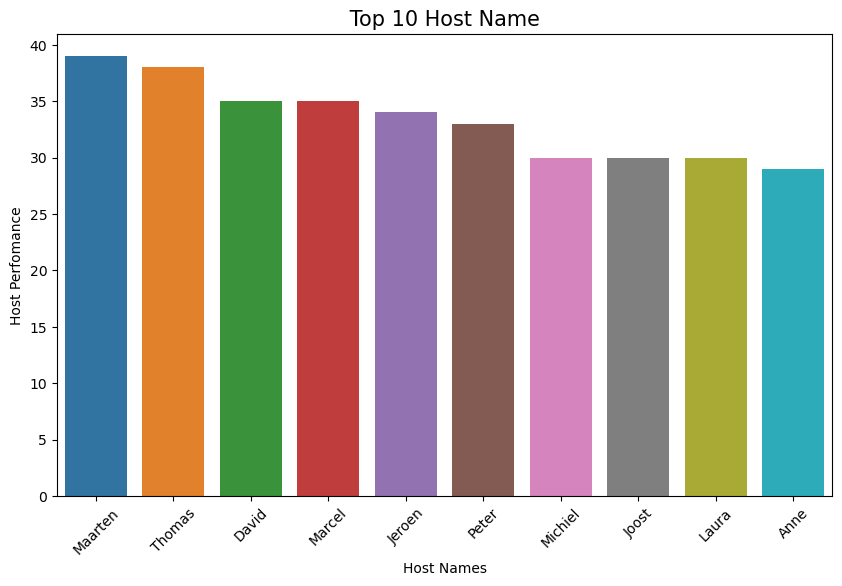

In [80]:
plt.figure(figsize=(10,6))

sns.barplot(data = cleaned_df,x=cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10].keys(),
y = cleaned_df['host_name'].value_counts().sort_values(ascending=False).iloc[:10])
plt.title(' Top 10 Host Name ',fontsize = 15)
plt.xlabel('Host Names')
plt.ylabel('Host Perfomance')
plt.xticks(rotation=45)
plt.show()

# 2. neighbourhood.
Represent NYC neighbourhood


In [81]:
cleaned_df['host_neighbourhood'].value_counts()[:10]

Oud-West                 542
Grachtengordel           264
De Pijp                  243
Jordaan                  198
Oosterparkbuurt          159
Bos en Lommer            132
Indische Buurt           109
Oost                      87
Nieuwmarkt en Lastage     82
Rivierenbuurt             76
Name: host_neighbourhood, dtype: int64

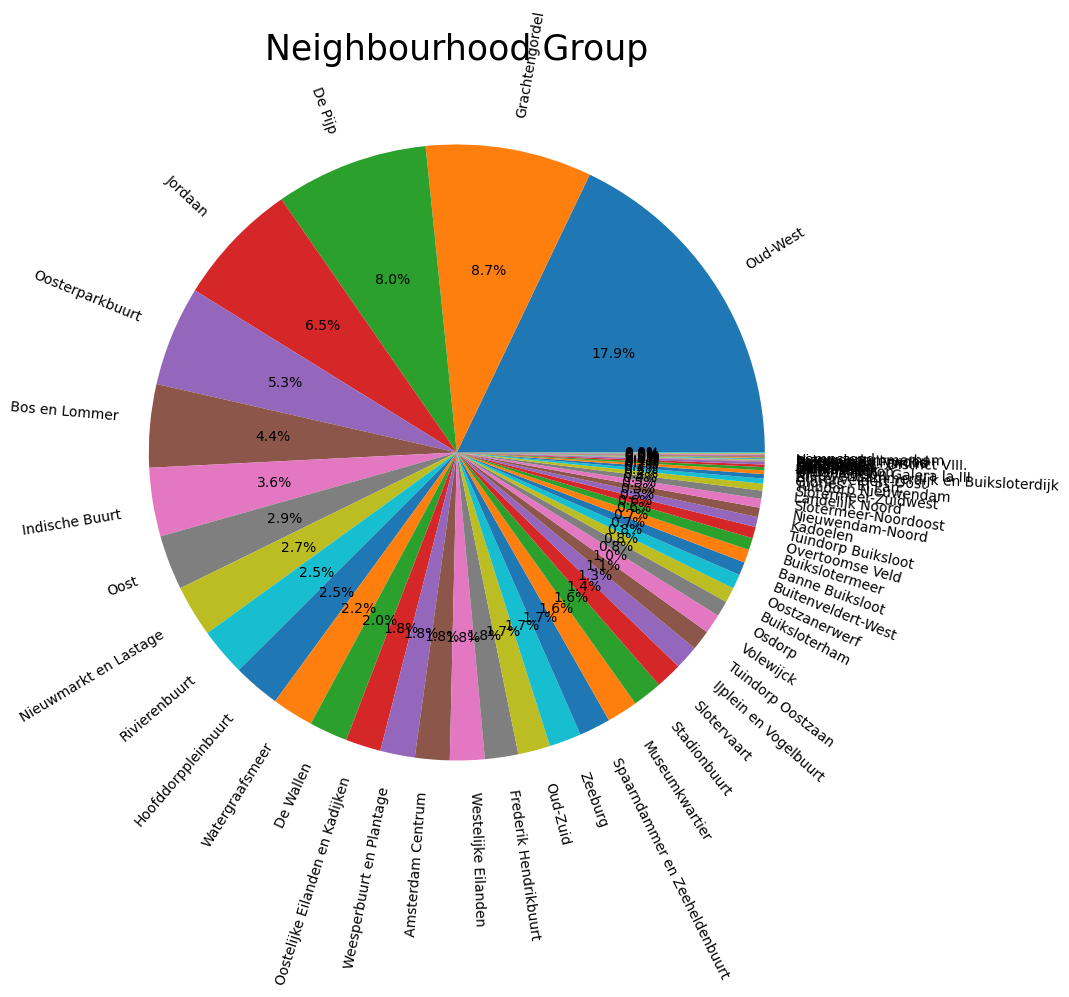

In [82]:
plt.figure(figsize=(10,10))
plt.pie(x = cleaned_df['host_neighbourhood'].value_counts(),
        labels=cleaned_df['host_neighbourhood'].value_counts().keys(),
        rotatelabels=True,autopct = '%1.1f%%'
       )
plt.title("Neighbourhood Group", fontsize = 25)
plt.show()

In [83]:
cleaned_df['host_neighbourhood'].value_counts()[:10]

Oud-West                 542
Grachtengordel           264
De Pijp                  243
Jordaan                  198
Oosterparkbuurt          159
Bos en Lommer            132
Indische Buurt           109
Oost                      87
Nieuwmarkt en Lastage     82
Rivierenbuurt             76
Name: host_neighbourhood, dtype: int64

3. Finding the top 10 host_id

Host_id - Unique ID for host who have listed the property on Airbnb.3

In [84]:
# Finding the value count
df['host_id'].value_counts().reset_index().iloc[:10]

index  host_id
0  203731852       22
1   14574533       21
2    4456680       18
3  364305280       17
4   46691672       16
5  488984558       14
6  241644101       14
7  243878598       12
8  245267147       12
9    5796250       11

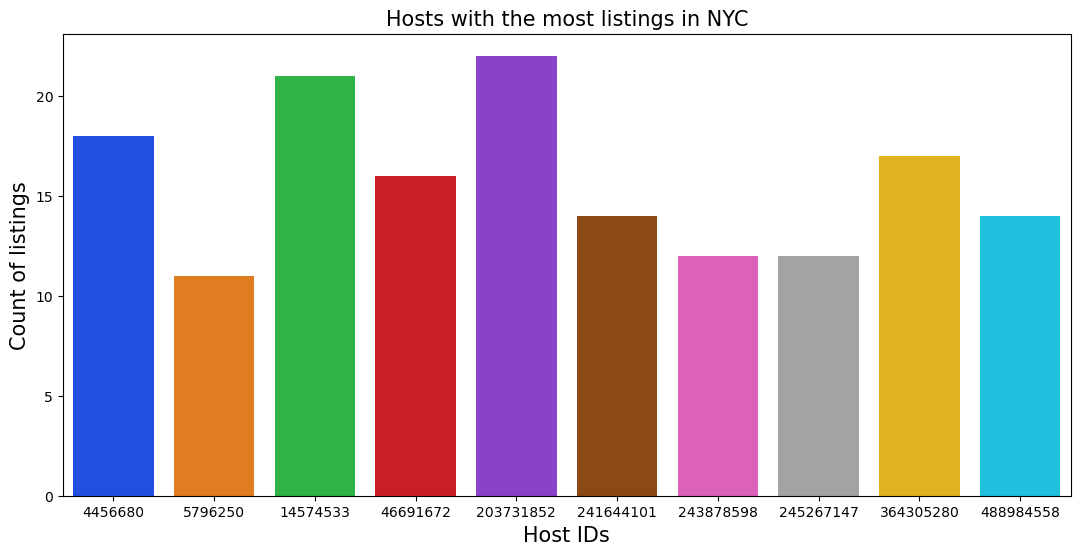

In [86]:
plt.figure(figsize = (13,6))
sns.barplot(x=cleaned_df['host_id'].value_counts().iloc[:10].keys(), y=cleaned_df['host_id'].value_counts().iloc[:10], data=cleaned_df,
                 palette='bright')
plt.title("Hosts with the most listings in NYC", fontsize = 15)
plt.xlabel("Host IDs", fontsize = 15)
plt.ylabel("Count of listings", fontsize = 15)
plt.show()

Observation

We can see that there is a good distribution between top 10 hosts with the most listings.

third host has more than 500+ listings.

5. Neighbourhood according to price

In [88]:
cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].apply(lambda price : price[1:]).apply(lambda price :price.replace(',','')))


C:\Users\hp\AppData\Local\Temp\ipykernel_33600\2842540762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price'] = pd.to_numeric(cleaned_df['price'].apply(lambda price : price[1:]).apply(lambda price :price.replace(',','')))


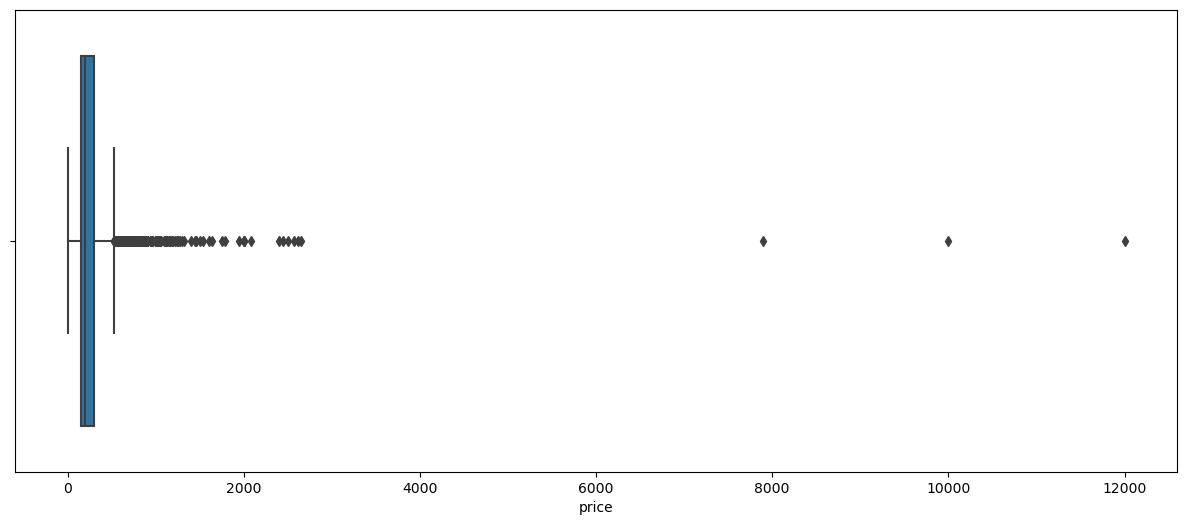

In [89]:
plt.figure(figsize=(15,6))
sns.boxplot(x = cleaned_df['price'])
plt.show()

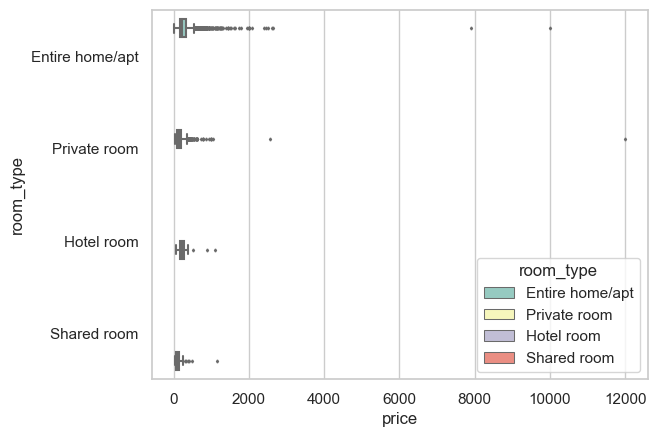

In [90]:
df_price=cleaned_df[cleaned_df['price']!=0].copy()
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=df_price)
plt.show()

In [91]:
cleaned_df['price'].describe()

count     7608.000000
mean       251.065589
std        263.170218
min          0.000000
25%        148.000000
50%        202.000000
75%        300.000000
max      12000.000000
Name: price, dtype: float64

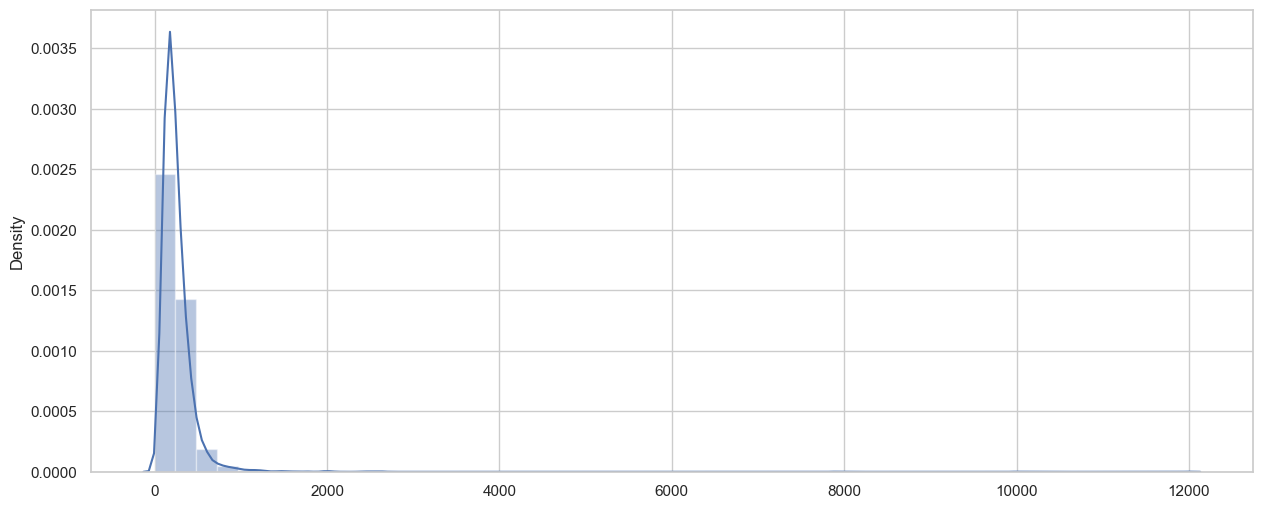

In [92]:
plt.figure(figsize=(15,6))
sns.distplot(x = cleaned_df['price'])
plt.show()

# Calculating the interquartile ranges

In [93]:
Q1 = cleaned_df['price'].quantile(0.25)
Q3 = cleaned_df['price'].quantile(0.75)
Q2 = cleaned_df['price'].median()
IQR = Q3 - Q1
print('The IQR is',IQR)
print('The Minimum value is', (Q3 - (1.5* (IQR))))
print('The maximum value is', (Q3 + (1.5* (IQR))))

The IQR is 152.0
The Minimum value is 72.0
The maximum value is 528.0


In [94]:
df_new = cleaned_df[cleaned_df['price'] < 450.0 ]
cleaned_df.groupby(['host_neighbourhood'])['price'].describe().T.reset_index()

host_neighbourhood  index  Amsterdam Centrum  Banne Buiksloot  Belváros  Bos en Lommer  Buiksloterham  Buikslotermeer  Buitenveldert-Oost  Buitenveldert-West  Cannaregio  Danilovskiy      De Pijp   De Wallen  Echo Park  El Raval  Frederik Hendrikbuurt  Glòries - El Parc  Grachtengordel  Hampstead  Hoofddorppleinbuurt  IJplein en Vogelbuurt  Indische Buurt      Jordaan  Józsefváros - District VIII.    Kadoelen  LB of Islington  La Combe  La Sagrada Família  Landelijk Noord  Merkaz HaIr  Museumkwartier  Nieuwendam-Noord  Nieuwendammerdijk en Buiksloterdijk  Nieuwendammerham  Nieuwmarkt en Lastage        Oost  Oostelijke Eilanden en Kadijken  Oosterparkbuurt  Oostzanerwerf      Osdorp    Oud-West    Oud-Zuid  Overtoomse Veld  Palermo Hollywood  Rivierenbuurt  Sant Antoni  Slotermeer-Noordoost  Slotermeer-Zuidwest  Slotervaart  Spaarndammer en Zeeheldenbuurt  Stadionbuurt  Stockwell  Tuindorp Buiksloot  Tuindorp Nieuwendam  Tuindorp Oostzaan  Urbanización Galera la III   Volewijck  \
0                   count          55.000000        21.000000       1.0     132.000000      24.000000       19.000000            5.000000           21.000000         1.0          1.0   243.000000   61.000000        1.0       1.0              53.000000           6.000000      264.000000        1.0            75.000000               38.00000      109.000000   198.000000                           1.0   15.000000              1.0       1.0                 1.0        11.000000          1.0       49.000000         14.000000                             4.000000               1.0              82.000000   87.000000                        56.000000       159.000000      23.000000   25.000000  542.000000   51.000000        18.000000                1.0      76.000000          1.0             13.000000             8.000000    42.000000                       50.000000     47.000000        1.0           16.000000             7.000000          32.000000                    4.000000   31.000000   
1                    mean         274.490909       144.761905     415.0     172.128788     427.916667      148.473684          218.800000          162.809524       225.0        300.0   241.884774  191.606557      300.0     195.0             225.358491          79.000000      273.276515      350.0           198.720000              162.00000      166.201835   251.934343                          66.0  197.133333            177.0     382.0               160.0       172.000000        420.0      334.428571        130.428571                           170.000000             150.0             257.414634  206.896552                       176.553571       199.201258     177.956522  144.760000  200.119926  241.803922       121.611111              165.0     248.407895        337.0            142.230769           171.250000   147.261905                      203.580000    229.617021      190.0          178.187500           147.428571         161.937500                  297.750000  253.387097   
2                     std         155.677715        60.968766       NaN      94.970498     524.154467       47.443965           91.565277           74.206886         NaN          NaN   129.359784  104.404067        NaN       NaN             115.382490          17.005881      197.836096        NaN           130.832941               73.48175       96.869785   143.456393                           NaN   90.660171              NaN       NaN                 NaN        89.697269          NaN      186.550820         64.336512                            90.122139               NaN             210.470780  116.732952                        89.506713       137.103388      81.962563   88.504369  103.500250  163.369889        87.663889                NaN     252.617507          NaN             78.452909           123.367917    80.968244                      108.706512    147.400011        NaN          107.585141            70.218367          73.848554                  142.497661  233.822821   
3                   

In [95]:
df_new.groupby(['host_neighbourhood'])['price'].describe().T.reset_index()

host_neighbourhood  index  Amsterdam Centrum  Banne Buiksloot  Belváros  Bos en Lommer  Buiksloterham  Buikslotermeer  Buitenveldert-Oost  Buitenveldert-West  Cannaregio  Danilovskiy     De Pijp   De Wallen  Echo Park  El Raval  Frederik Hendrikbuurt  Glòries - El Parc  Grachtengordel  Hampstead  Hoofddorppleinbuurt  IJplein en Vogelbuurt  Indische Buurt     Jordaan  Józsefváros - District VIII.    Kadoelen  LB of Islington  La Combe  La Sagrada Família  Landelijk Noord  Merkaz HaIr  Museumkwartier  Nieuwendam-Noord  Nieuwendammerdijk en Buiksloterdijk  Nieuwendammerham  Nieuwmarkt en Lastage        Oost  Oostelijke Eilanden en Kadijken  Oosterparkbuurt  Oostzanerwerf      Osdorp    Oud-West    Oud-Zuid  Overtoomse Veld  Palermo Hollywood  Rivierenbuurt  Sant Antoni  Slotermeer-Noordoost  Slotermeer-Zuidwest  Slotervaart  Spaarndammer en Zeeheldenbuurt  Stadionbuurt  Stockwell  Tuindorp Buiksloot  Tuindorp Nieuwendam  Tuindorp Oostzaan  Urbanización Galera la III   Volewijck  \
0                   count          49.000000        21.000000       1.0     130.000000      16.000000       19.000000            5.000000           21.000000         1.0          1.0  228.000000   58.000000        1.0       1.0              51.000000           6.000000      229.000000        1.0            71.000000               38.00000      107.000000  183.000000                           1.0   15.000000              1.0       1.0                 1.0        11.000000          1.0       40.000000         14.000000                             4.000000               1.0              77.000000   83.000000                        55.000000       154.000000      23.000000   25.000000  524.000000   46.000000        18.000000                1.0      68.000000          1.0             13.000000             8.000000    42.000000                       49.000000     42.000000        1.0           16.000000             7.000000          32.000000                    3.000000   26.000000   
1                    mean         235.795918       144.761905     415.0     167.161538     179.875000      148.473684          218.800000          162.809524       225.0        300.0  219.175439  173.879310      300.0     195.0             214.450980          79.000000      217.069869      350.0           176.112676              162.00000      157.158879  221.584699                          66.0  197.133333            177.0     382.0               160.0       172.000000        420.0      269.975000        130.428571                           170.000000             150.0             218.545455  191.409639                       169.945455       181.909091     177.956522  144.760000  189.022901  198.608696       121.611111              165.0     188.485294        337.0            142.230769           171.250000   147.261905                      195.510204    188.976190      190.0          178.187500           147.428571         161.937500                  230.666667  160.000000   
2                     std         100.042903        60.968766       NaN      86.681436     112.947702       47.443965           91.565277           74.206886         NaN          NaN   88.998713   68.613864        NaN       NaN             102.895736          17.005881       97.468683        NaN            80.292955               73.48175       70.815619   85.441852                           NaN   90.660171              NaN       NaN                 NaN        89.697269          NaN      110.782876         64.336512                            90.122139               NaN              83.526319   94.463315                        75.293849        80.912150      81.962563   88.504369   84.842760   89.684999        87.663889                NaN      91.058206          NaN             78.452909           123.367917    80.968244                       93.484652     85.529766        NaN          107.585141            70.218367          73.848554                   58.799093   64.878348   
3                     min   

In [97]:
cleaned_df['room_type'].value_counts()

Entire home/apt    5783
Private room       1726
Hotel room           56
Shared room          43
Name: room_type, dtype: int64

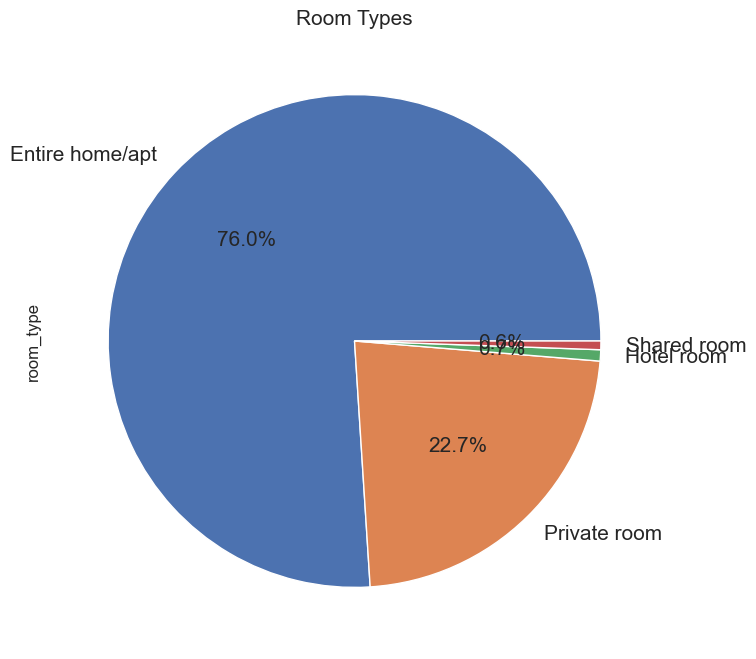

In [98]:
plt.figure(figsize=(8,5))
cleaned_df['room_type'].value_counts().plot(kind = 'pie', figsize = (8,8), fontsize = 15, autopct = '%1.1f%%')
plt.title("Room Types", fontsize = 15)
plt.show()

# Observation
Most of the people happen to rent the entire home or apartment which constitutes to 56.6% according to the chart. 

Followed by 41.8% people consider having private room, and shared is the least considered room type.

In [99]:
cleaned_df.groupby(['room_type'])['price'].mean().reset_index()

room_type       price
0  Entire home/apt  272.403251
1       Hotel room  240.142857
2     Private room  182.154693
3      Shared room  161.674419

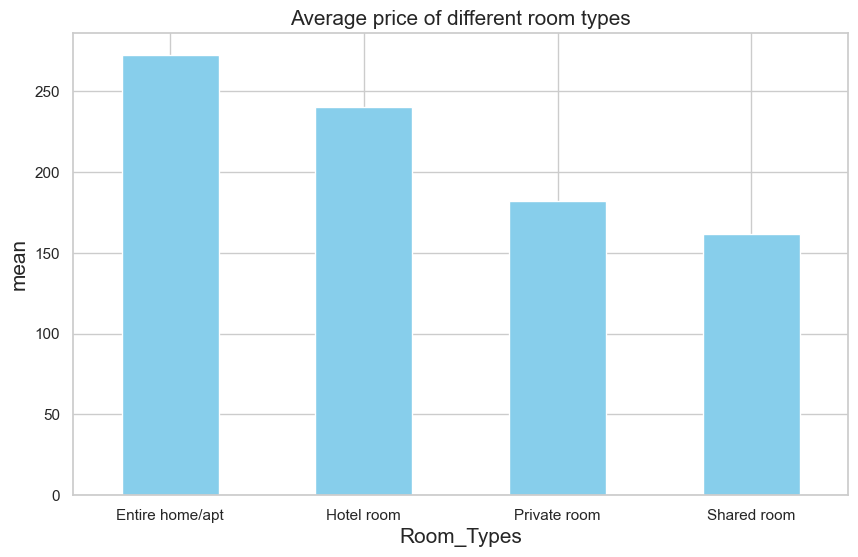

In [100]:
cleaned_df.groupby(['room_type'])['price'].mean().plot(kind='bar', figsize = (10,6), color = 'skyblue')
plt.xticks( rotation = 360)
plt.title("Average price of different room types", fontsize = 15)
plt.xlabel('Room_Types', fontsize = 15)
plt.ylabel('mean', fontsize = 15)
plt.show()


In [101]:
cleaned_df.groupby(['room_type'])['price'].describe()

count        mean         std   min    25%    50%    75%      max
room_type                                                                          
Entire home/apt  5783.0  272.403251  244.698424  18.0  165.0  228.0  320.0  10000.0
Hotel room         56.0  240.142857  173.685654   0.0  160.0  216.5  282.5   1089.0
Private room     1726.0  182.154693  310.524159  30.0  101.0  146.0  209.0  12000.0
Shared room        43.0  161.674419  186.889797  50.0   79.0   91.0  155.5   1150.0

In [102]:
host_areas =cleaned_df.groupby(['host_name','host_neighbourhood'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(5)

host_name   host_neighbourhood  calculated_host_listings_count
2166                          Sweets  Hoofddorppleinbuurt                              22
640                       Eva & Kobe       Grachtengordel                              16
1868                           Remco              Jordaan                              11
2123  St Christophers At The Winston            De Wallen                               9
506                    Dutch Masters       Grachtengordel                               9

# Observation
We find that Host name Blueground has listed highest number of listings in Cambridge followed by Blueground

What we learn from room type and their prices according to area?

In [103]:
room_price_area_wise = cleaned_df.groupby(['host_neighbourhood','room_type'])['price'].max().reset_index()
#room_price_area_wise.sort_values(by='price', ascending=False)

room_price_area_wise.sort_values("price",ascending=False).head(10)

host_neighbourhood        room_type   price
118    Westelijke Eilanden  Entire home/apt  7900.0
10           Buiksloterham  Entire home/apt  2400.0
89           Rivierenbuurt  Entire home/apt  2000.0
63   Nieuwmarkt en Lastage  Entire home/apt  1790.0
31          Grachtengordel  Entire home/apt  1600.0
73         Oosterparkbuurt      Shared room  1150.0
43                 Jordaan  Entire home/apt  1100.0
71         Oosterparkbuurt       Hotel room  1089.0
32          Grachtengordel     Private room  1057.0
56          Museumkwartier  Entire home/apt  1036.0

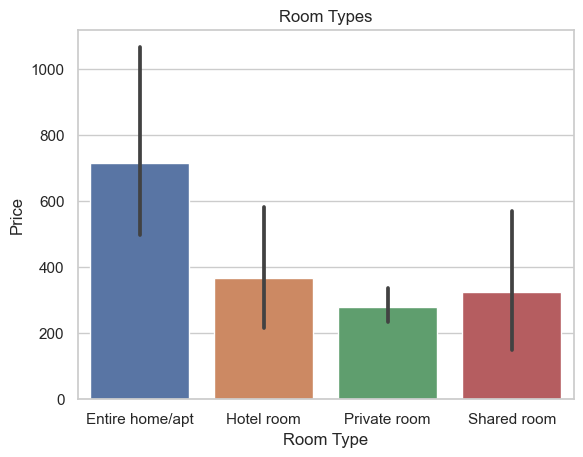

In [104]:
sns.barplot(data=room_price_area_wise,x = 'room_type',y='price')
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [105]:
sampel_ptype_listing_counts = cleaned_df.groupby(['host_neighbourhood','property_type','room_type'])['host_total_listings_count'].max().sort_values(ascending=False).reset_index().head(10)
sampel_ptype_listing_counts

host_neighbourhood                      property_type        room_type  host_total_listings_count
0           Oud-Zuid  Private room in bed and breakfast     Private room                        741
1           Oud-Zuid               Private room in home     Private room                        741
2      Bos en Lommer   Shared room in bed and breakfast      Shared room                        533
3      Bos en Lommer                 Entire rental unit  Entire home/apt                        533
4      Bos en Lommer                               Boat  Entire home/apt                        533
5            Jordaan        Private room in rental unit     Private room                        307
6            Jordaan                 Entire rental unit  Entire home/apt                        307
7     Grachtengordel                 Entire rental unit  Entire home/apt                        270
8     Grachtengordel                        Entire loft  Entire home/apt                        270
9     Grachtengordel                       Entire condo  Entire home/apt                        270

In [106]:
sampel_ptype_listing_counts.columns

Index(['host_neighbourhood', 'property_type', 'room_type', 'host_total_listings_count'], dtype='object')

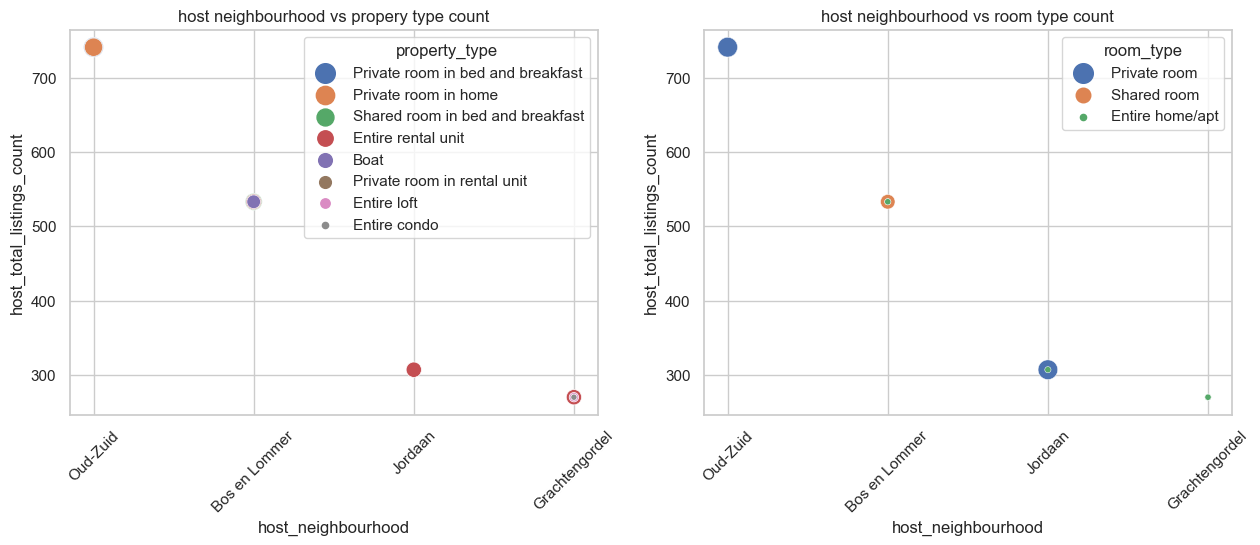

In [107]:
plt.figure(figsize=(15,5))
axes1 = plt.subplot(1, 2, 1)
sns.scatterplot(data = sampel_ptype_listing_counts,x = 'host_neighbourhood',y='host_total_listings_count',hue='property_type',size='property_type',ax=axes1,sizes=(20, 200), legend="full",palette="deep")
plt.title('host neighbourhood vs propery type count')
plt.xticks(rotation=45)

axes2= plt.subplot(1, 2, 2)
sns.scatterplot(data = sampel_ptype_listing_counts,x = 'host_neighbourhood',y='host_total_listings_count',hue='room_type',size='room_type',ax=axes2,sizes=(20, 200), legend="full",palette="deep")
plt.title('host neighbourhood vs room type count')
plt.xticks(rotation=45)
plt.show()

# What can we learn from Data? (ex: locations, prices, reviews, etc)


In [108]:
neighbourhood_reviews = cleaned_df.groupby(['neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()
neighbourhood_reviews.head()

area_reviews = cleaned_df.groupby(['host_neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index()
#area_reviews.head()

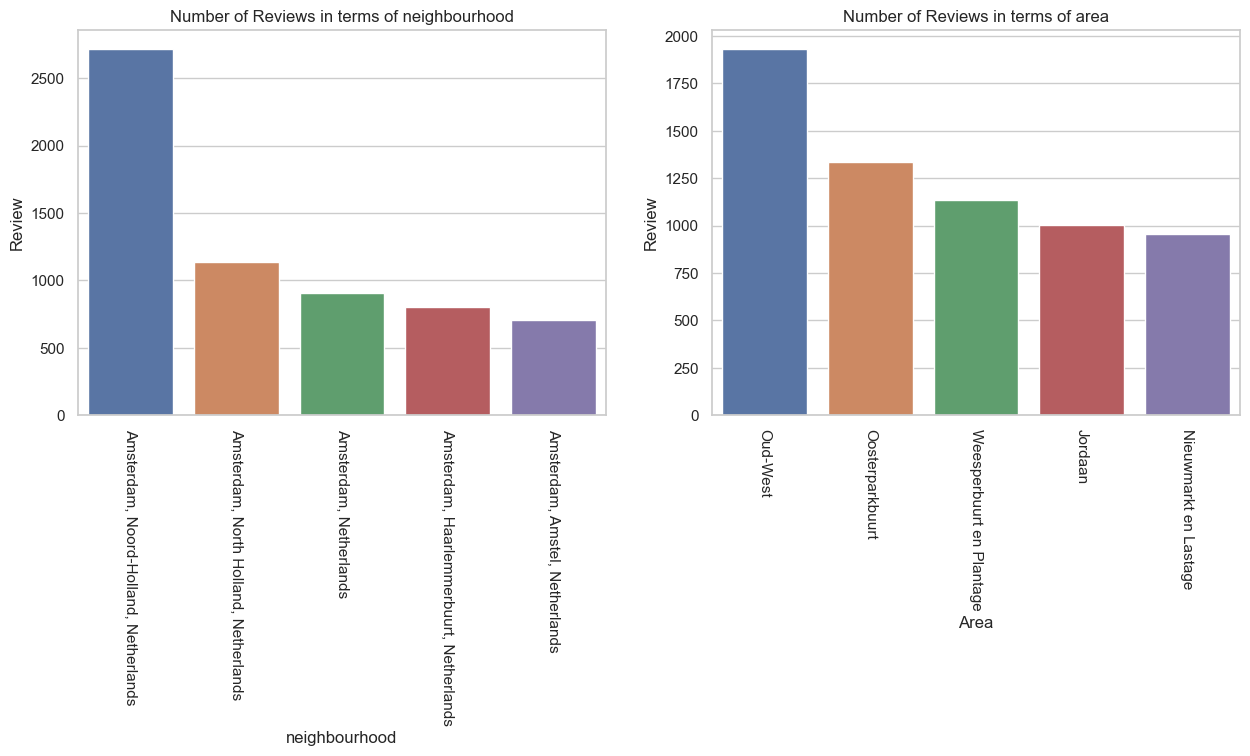

In [109]:
plt.figure(figsize=(15,5))
axes1 = plt.subplot(1, 2, 1)
sns.barplot(data=neighbourhood_reviews.head(),x ='neighbourhood',y='number_of_reviews',ax=axes1)
plt.xlabel('neighbourhood')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of neighbourhood")
plt.xticks(rotation=270)

axes2 = plt.subplot(1, 2, 2)
sns.barplot(data=area_reviews.head(),x ='host_neighbourhood',y='number_of_reviews',ax=axes2)
plt.xlabel('Area')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of area")
plt.xticks(rotation=270)

plt.show()

In [110]:
price_area = cleaned_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

price  number_of_reviews
0    0.0                318
1   18.0                 42
2   30.0                 17
3   31.0                261
4   35.0                 52
5   36.0                  0
6   39.0                 12
7   40.0                232
8   42.0                 55
9   43.0                  5

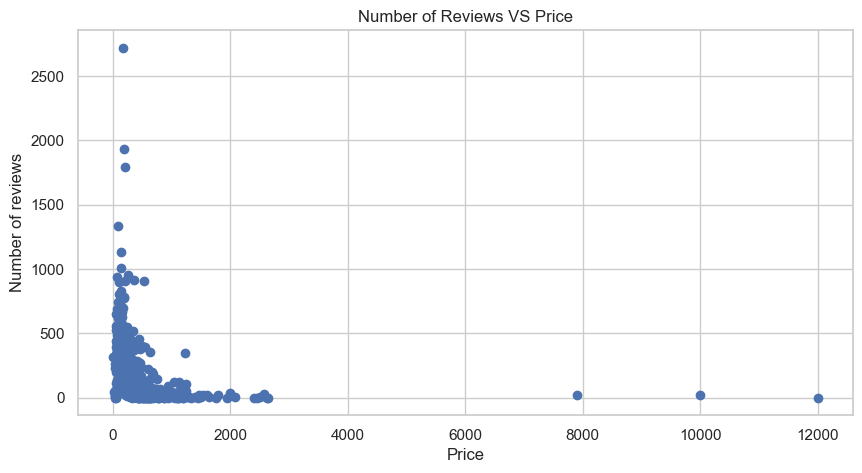

In [111]:
price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()

# From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas


# Which hosts are the busiest and why is the reason?

In [112]:
busy_hosts = cleaned_df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_hosts = busy_hosts.sort_values(by = 'number_of_reviews', ascending =False).head(10)
busy_hosts

host_id                         host_name        room_type  number_of_reviews
6249  407017762                         Jean Paul     Private room               2720
5811  243087395                           CityHub       Hotel room               1934
6132  363404652  Conscious Hotel The Tire Station     Private room               1794
5851  251479377                         Generator      Shared room               1334
741     4221960                             Peter     Private room               1134
19       186729                            Shawna  Entire home/apt               1005
386     2586026                          Nathalie  Entire home/apt                955
5850  251479377                         Generator     Private room                916
802     4443833                         Nova Team  Entire home/apt                911
5745  228208519                              Eric  Entire home/apt                906

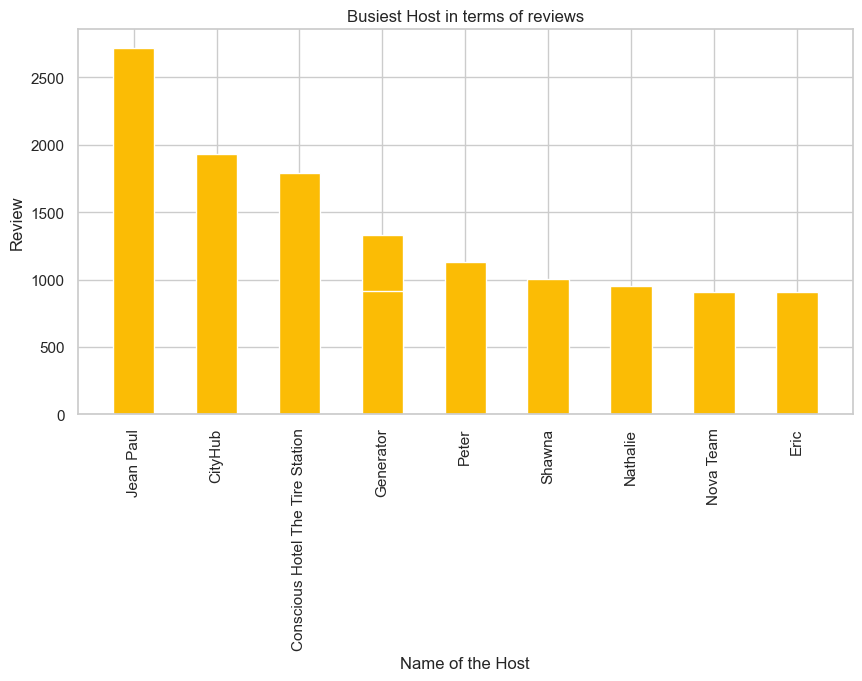

In [113]:
name_hosts = busy_hosts['host_name']
review_got = busy_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='#fbbc05', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.xticks(rotation=90)
plt.show()

In [115]:
Highest_price= cleaned_df.groupby(['host_id','host_name','room_type','host_neighbourhood'])['price'].max().reset_index()
Highest_price= Highest_price.sort_values(by = 'price', ascending =False).head(10)
Highest_price

host_id  host_name        room_type     host_neighbourhood   price
385     3884675     Devran  Entire home/apt    Westelijke Eilanden  7900.0
1919   57865143    Laurens  Entire home/apt          Buiksloterham  2400.0
1850   50435166       Kees  Entire home/apt          Rivierenbuurt  2000.0
156     1791317     Robert  Entire home/apt  Nieuwmarkt en Lastage  1790.0
538     5128876  Alexandra  Entire home/apt         Grachtengordel  1600.0
452     4386675  Amsterdam  Entire home/apt          Buiksloterham  1246.0
1342   20644650    Richard  Entire home/apt    Westelijke Eilanden  1160.0
2512  251479377  Generator      Shared room        Oosterparkbuurt  1150.0
1244   17438517      Milan  Entire home/apt                Jordaan  1100.0
2615  503491020    Rosalie       Hotel room        Oosterparkbuurt  1089.0

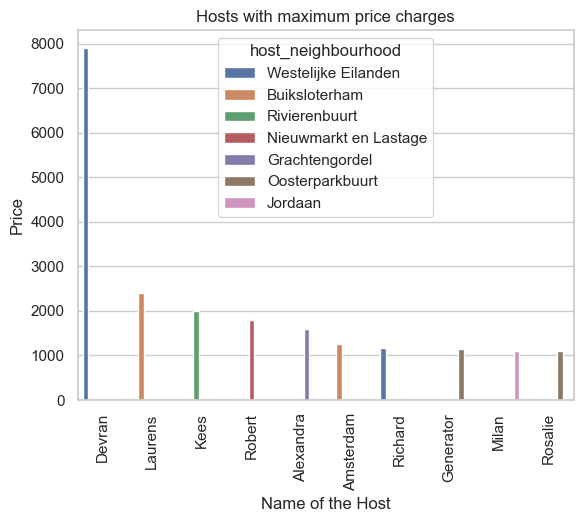

In [116]:
sns.barplot(data=Highest_price,x='host_name',y='price',hue='host_neighbourhood')
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.xticks(rotation=90)
plt.show()

In [117]:
traffic_areas = cleaned_df.groupby(['host_neighbourhood','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by ='minimum_nights',ascending = False).head(10)
traffic_areas

host_neighbourhood        room_type  minimum_nights
79           Oud-West  Entire home/apt             427
20            De Pijp  Entire home/apt             185
31     Grachtengordel  Entire home/apt             152
43            Jordaan  Entire home/apt             129
70    Oosterparkbuurt  Entire home/apt             118
32     Grachtengordel     Private room             111
81           Oud-West     Private room             110
7       Bos en Lommer  Entire home/apt             105
41     Indische Buurt  Entire home/apt              93
45            Jordaan     Private room              62

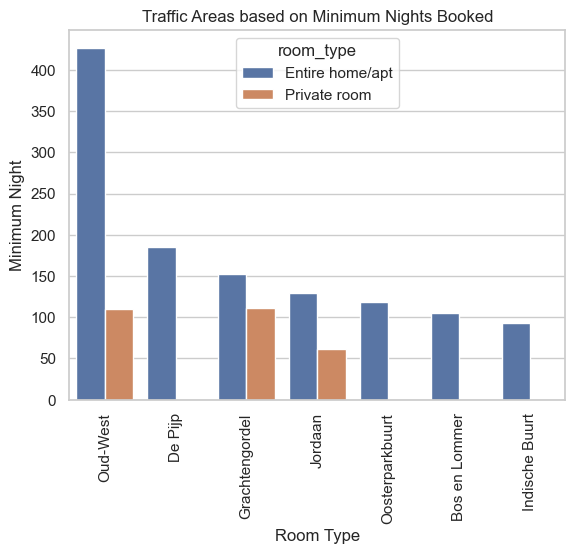

In [118]:
sns.barplot(data=traffic_areas,x='host_neighbourhood',y='minimum_nights',hue='room_type')
plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.xticks(rotation=90)
plt.show()


# From this visualization We found that most of the people likely to stay at Entire home and Private room

which are present in Bedford-Stuyvesant, Williamsburg & Bushwick and also vistors referring stay in room which listing
price is less.

Correlation Between Features

In [126]:
cleaned_df.corr(method = "kendall")

host_id  host_listings_count  host_total_listings_count  neighbourhood_group_cleansed  latitude  longitude  accommodates  bathrooms  bedrooms      beds     price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month
host_id                                       1.000000             0.116254                   0.003055                           NaN -0.002506   0.005803     -0.046646        NaN -0.100835 -0.035516  0.057255       -0.154937       -0.000372               -0.148663               -0.094154               -0.026970               -0.016508               -0.138553               -0.024682         0.127536         0.114417         0.102062          0.091244          -0.100956               0.044699                0.040172             -0.059293               -0.040151                  -0.013890              -0.029375                    -0.044223                0.023618            -0.063448                        0.143113                                    -0.047334                                      0.095026                                     0.073340           0.110718
host_listings_count                           0.116254             1.000000                   0.680569                           NaN  0.039150   0.032498     -0.074812        NaN -0.080449 -0.017413 -0.014521       -0.171944        0.123861               -0.197674               -0.017948                0.062189                0.105092               -0.130472                0.079954         0.233831         0.215737         0.210773          0.208465           0.134783               0.159830                0.112734             -0.171368               -0.207546                  -0.127397              -0.202975                    -0.238681               -0.071376            -0.166257                        0.875267                                     0.000731                                      0.473859                                     0.176720           0.169699
host_total_listings_count                     0.003055             0.680569                   1.000000                           NaN  0.034204   0.022165     -0.026574        NaN -0.021333  0.015254  0.009347       -0.122840        0.125401               -0.143815                0.002477                0.068104                0.105470               -0.086994                0.084570         0.191939         0.179494         0.173113          0.167466           0.086213               0.107003                0.073509             -0.142927               -0.178965                  -0.114236              -0.150783                    -0.205903               -0.042904            -0.135800                        0.607102                                    -0.012341                                      0.349415                                     0.146069           0.114963
neighbourhood_group_cleansed                       NaN                  NaN                        NaN                           NaN       NaN        NaN           NaN        NaN       NaN       NaN       NaN             NaN             NaN                     NaN                     NaN                     NaN                     NaN                     NaN                     NaN              NaN              NaN              NaN               NaN                NaN                    NaN                     NaN                   N

<AxesSubplot:>

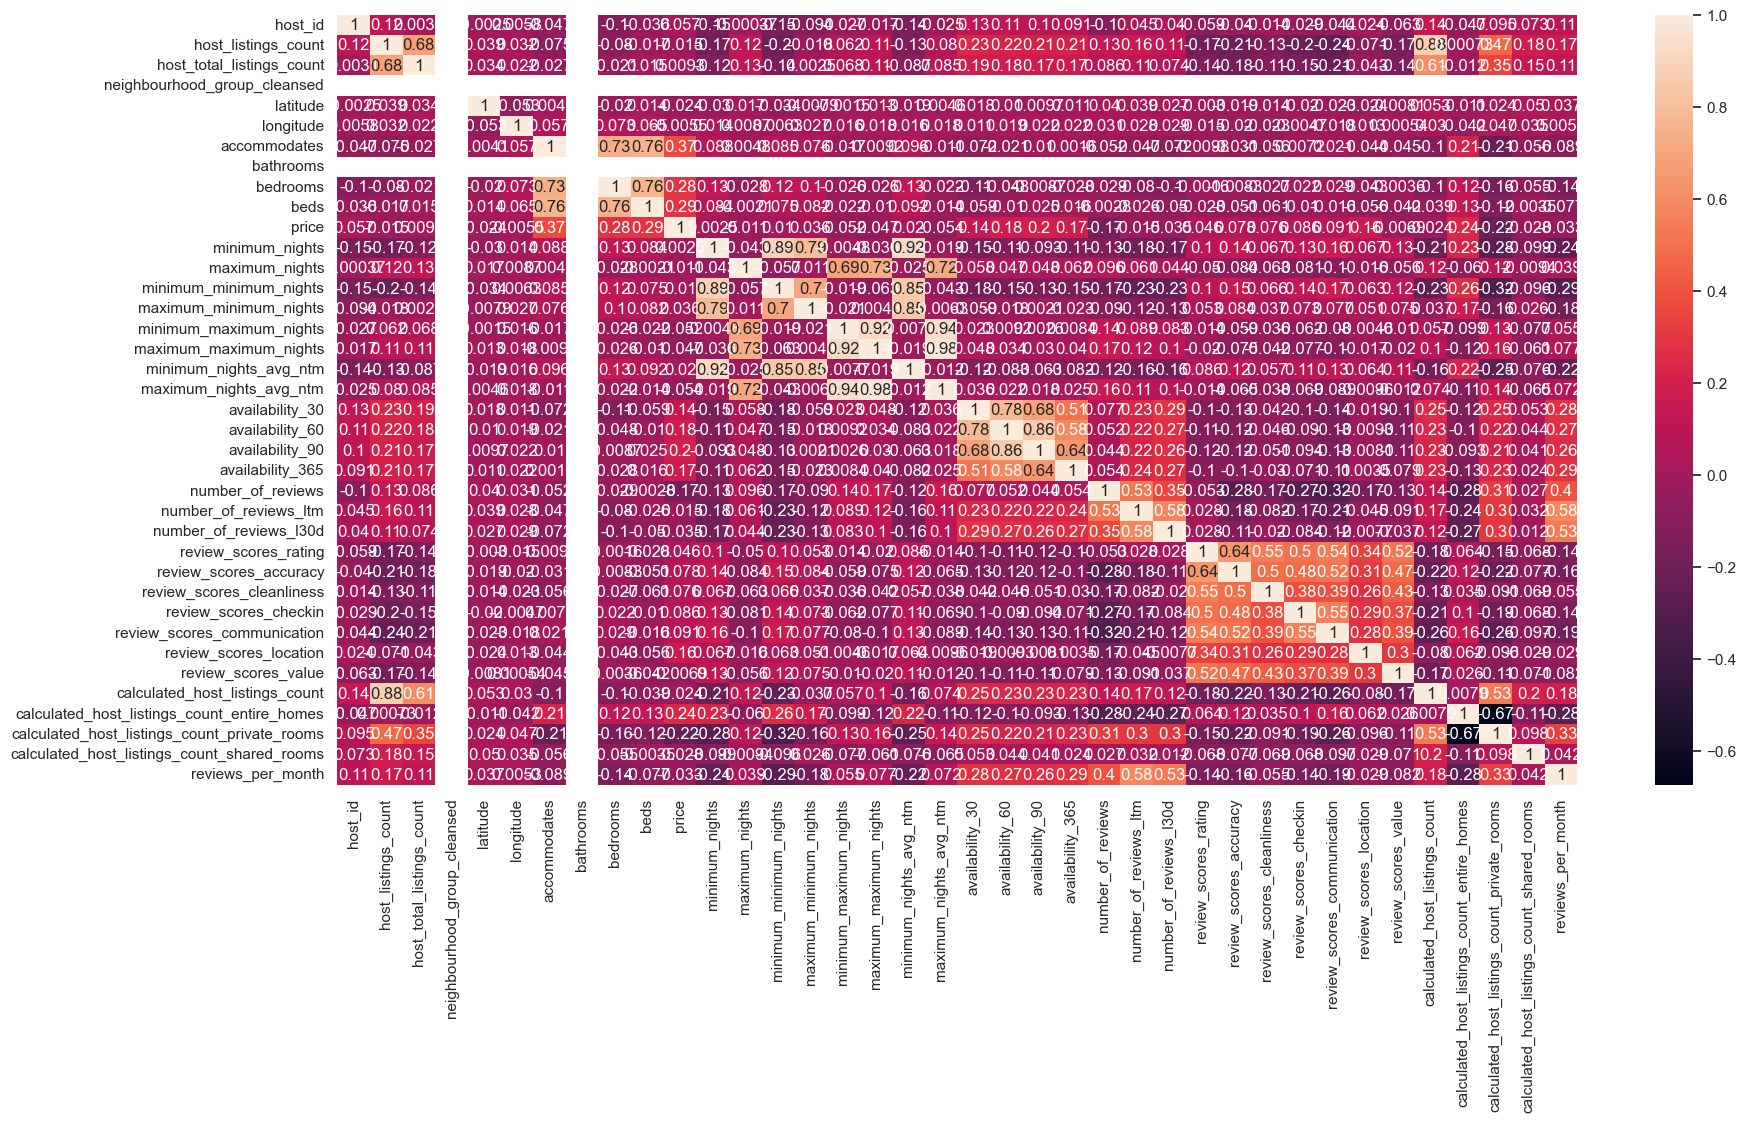

In [128]:
fig =plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr(method = "kendall"),annot = True)

In [130]:
neighbourhood_room_type_count = cleaned_df.groupby(['host_neighbourhood'])[['host_neighbourhood','room_type']].value_counts().sort_values(ascending=False).reset_index()

res= neighbourhood_room_type_count.head(10)

sns.distplot(neighbourhood_room_type_count["count"])

plt.show()


KeyError: 'count'

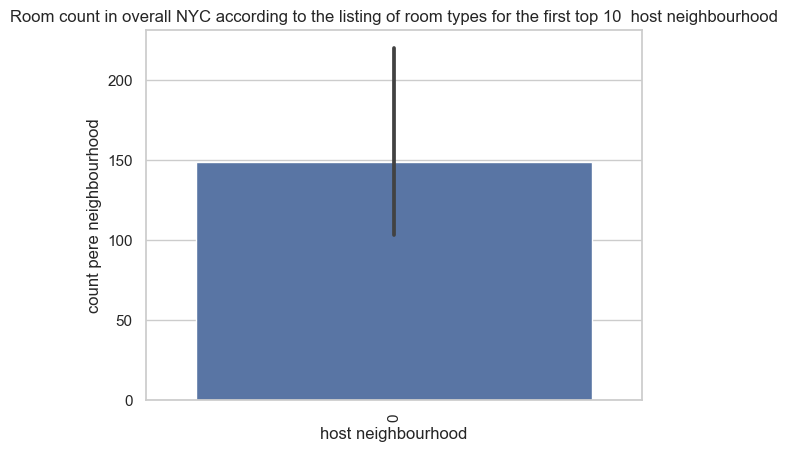

In [134]:
sns.barplot(data=res)
plt.xlabel("host neighbourhood")
plt.ylabel("count pere neighbourhood")
plt.title("Room count in overall NYC according to the listing of room types for the first top 10  host neighbourhood")
plt.xticks(rotation=90)
plt.show()


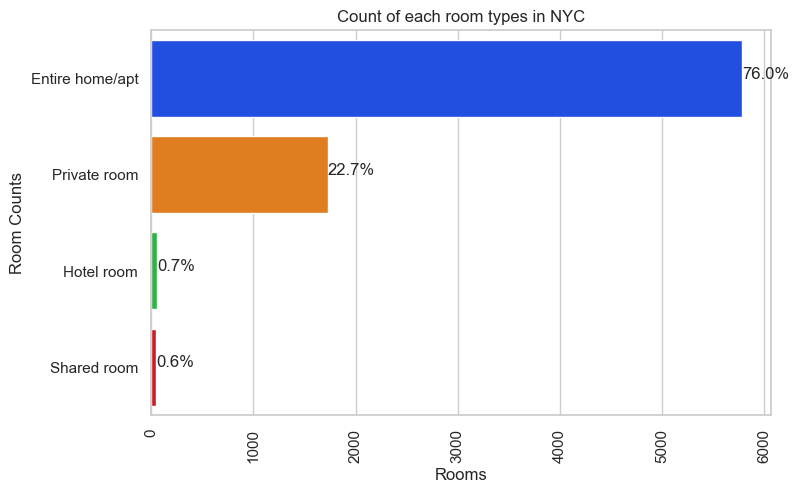

In [135]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',data=cleaned_df,palette='bright')

total = len(cleaned_df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

# What can we learn from predictions? (ex: locations, prices, reviews, etc)
First we will try to visualize the location of each apprtment usinglatitude and longitude values

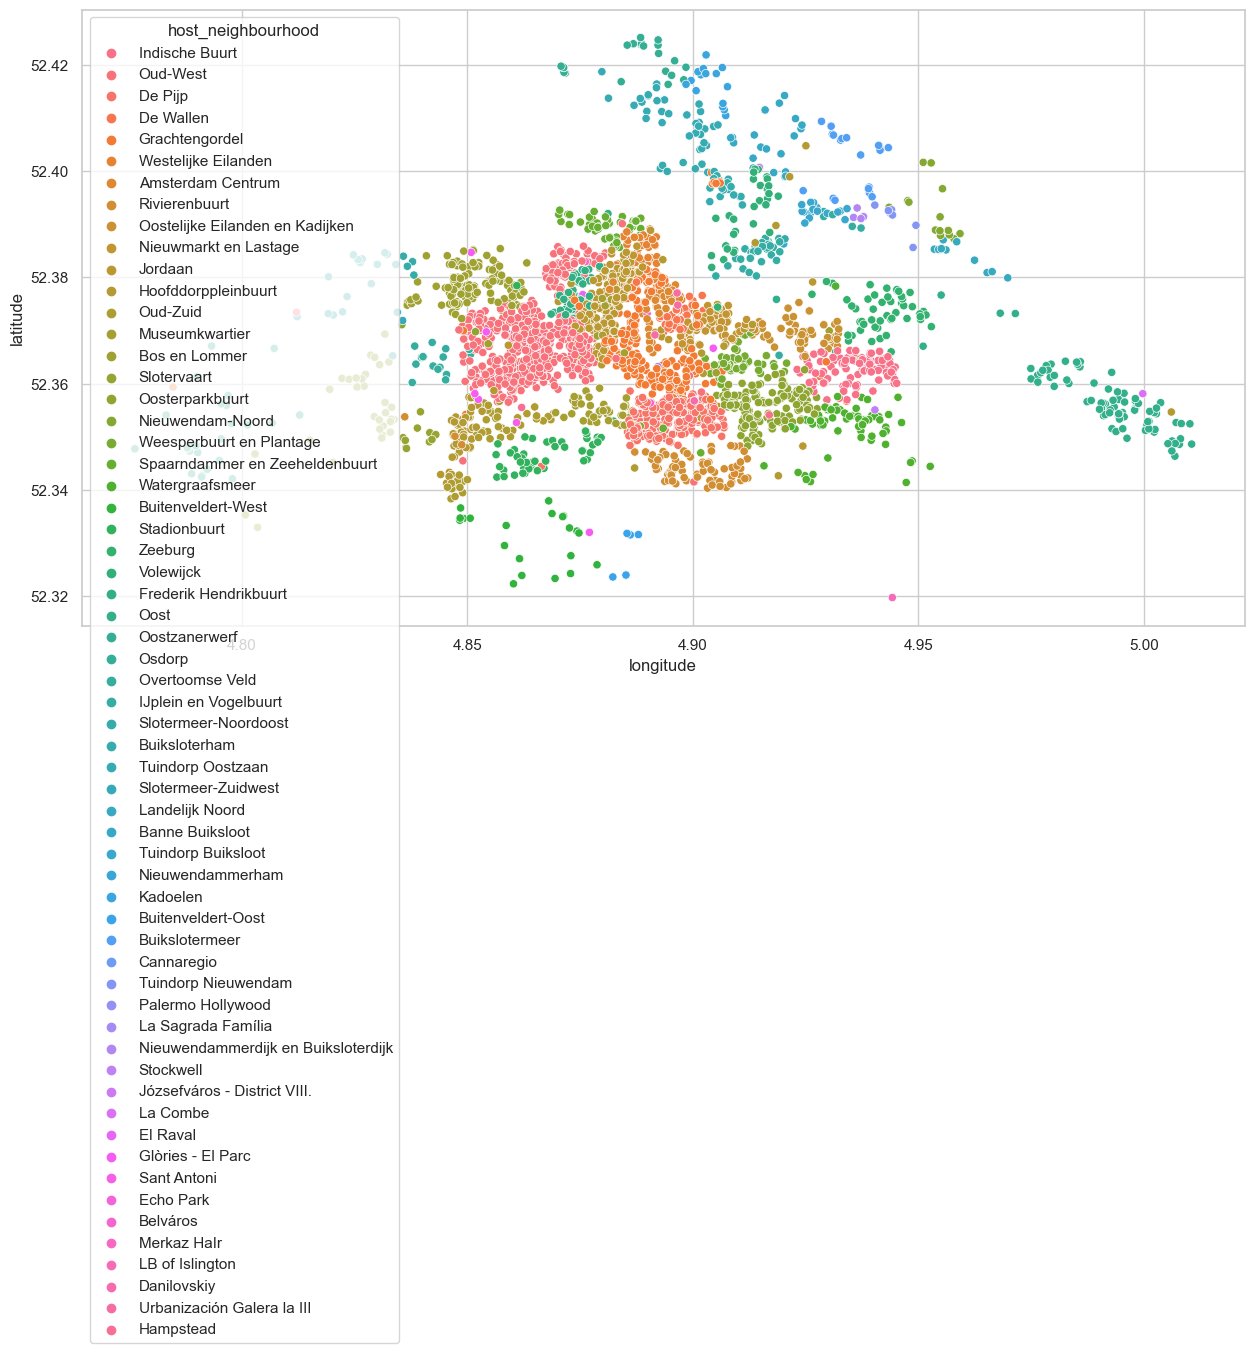

In [136]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=cleaned_df,x='longitude',y='latitude', hue='host_neighbourhood')
plt.show()

# What is the distribution of the room type and its distribution over the location ?

<AxesSubplot:>

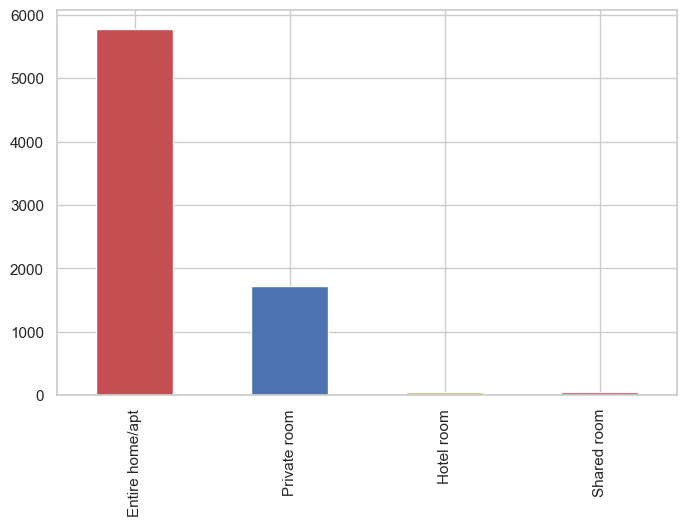

In [137]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

So we can notice the following

1) that maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms .

2)So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared rooms

lets see how room_type is distributed over all location ,is there any place where there is a dominance of any

particular room_type over the others despite of thier overall ratios ?

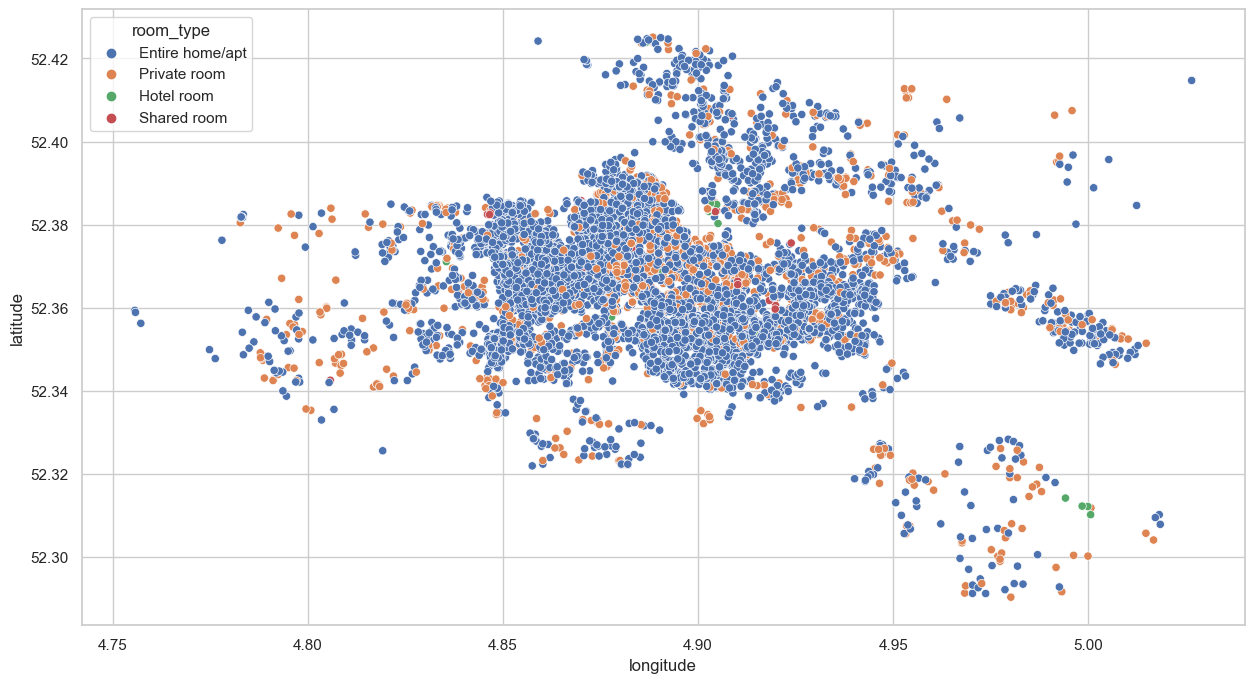

In [138]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=cleaned_df['longitude'],y=cleaned_df['latitude'], hue=cleaned_df['room_type'])
plt.show()

lets see how property_type is distributed over all location ,is there any place where there is a dominance of any particular property_type over the others despite of thier overall ratios ?

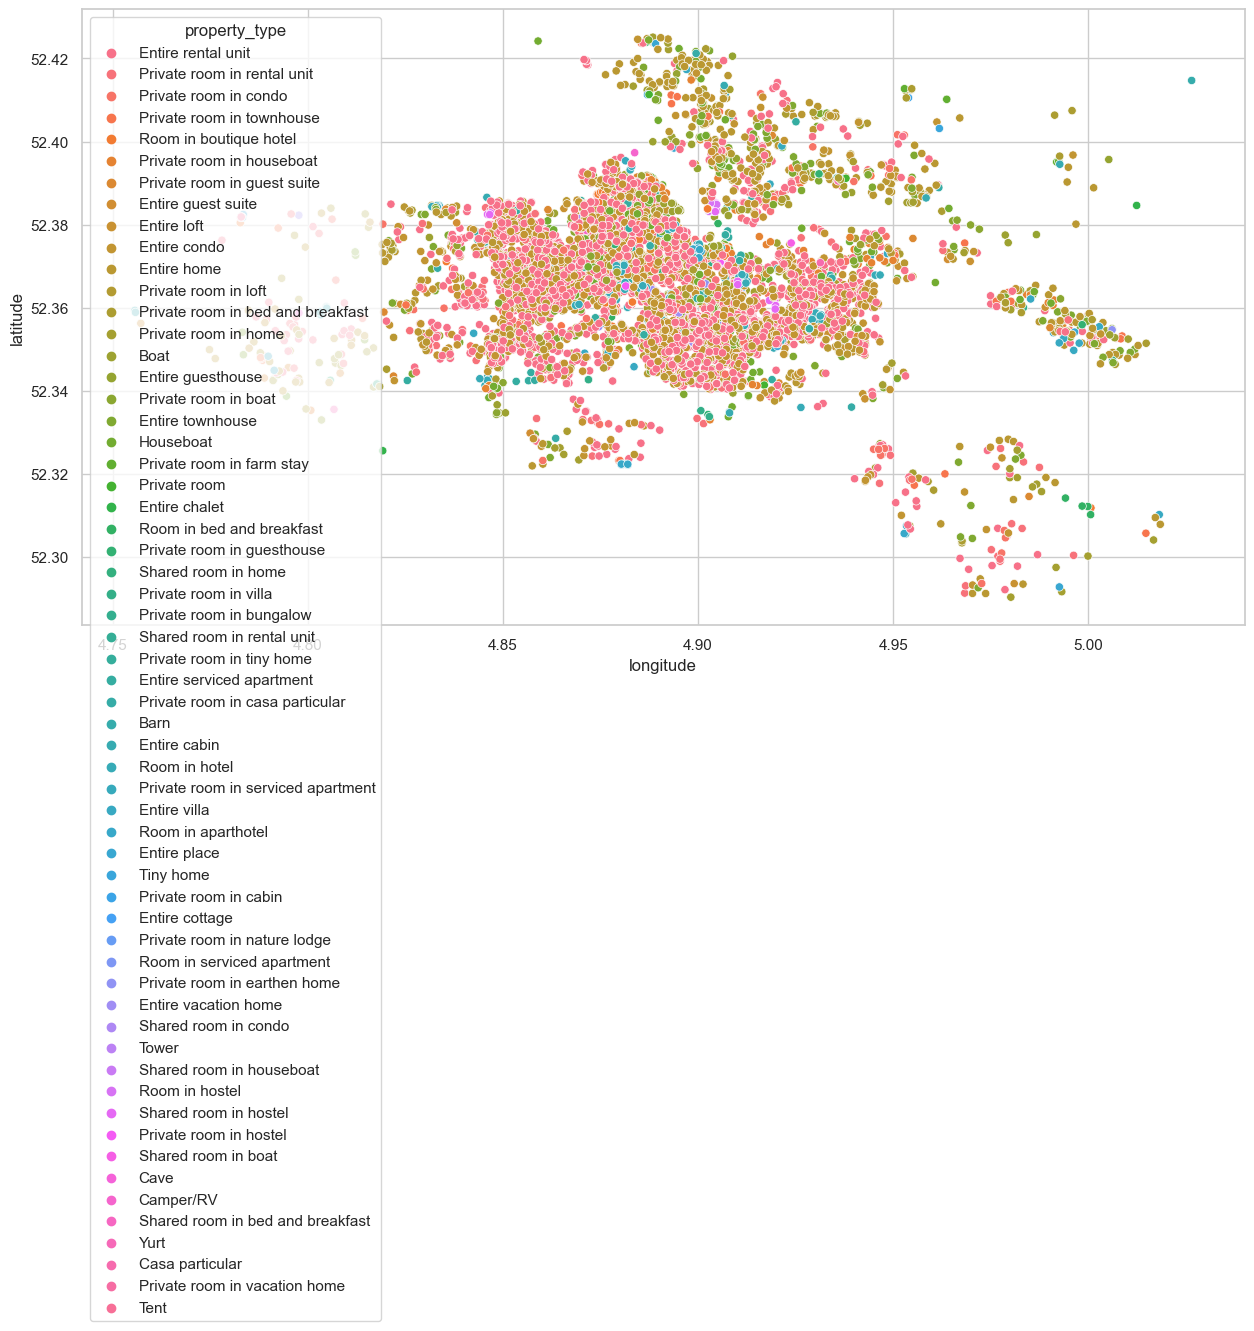

In [139]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=cleaned_df['longitude'],y=cleaned_df['latitude'], hue=cleaned_df['property_type'])
plt.show()